# Nielsen Case Study Analysis

By Jackie Petersen

# Code

---

## EDA

---

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [275]:
data = pd.read_csv('census_labeled.csv')

#### Checking through the data briefly to get an idea of what is in the dataset.

In [276]:
data.head()

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
0,Stark County,Ohio,False,2010,192651,5.5,6.3,6.0,6.2,5.7,...,7.0,7.4,8.1,7.4,6.2,4.8,3.1,2.6,2.0,1.5
1,Summit County,Ohio,False,2010,279592,5.6,5.8,6.2,6.5,6.1,...,6.8,7.6,8.1,7.5,5.6,3.6,3.3,2.5,2.0,1.2
2,Trumbull County,Ohio,False,2010,108490,5.4,5.9,6.3,6.2,5.0,...,6.7,7.1,8.1,6.9,7.5,5.7,3.0,2.5,2.6,1.5
3,Tuscarawas County,Ohio,False,2010,47279,5.5,5.2,7.7,6.5,4.9,...,5.5,7.2,8.1,6.2,7.2,4.0,4.0,2.4,2.5,1.4
4,Warren County,Ohio,True,2010,105706,6.4,7.0,8.5,6.4,4.2,...,6.9,8.3,7.4,5.2,5.7,3.3,2.3,1.7,1.3,0.7


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   county name                            4951 non-null   object 
 1   state                                  4951 non-null   object 
 2   county_population_increased_2015_2016  4945 non-null   object 
 3   year                                   4951 non-null   int64  
 4   female_total_population                4951 non-null   int64  
 5   female_age_under_5_pct                 4951 non-null   float64
 6   female_age_5_to_9_pct                  4951 non-null   float64
 7   female_age_10_to_14_pct                4951 non-null   float64
 8   female_age_15_to_19_pct                4951 non-null   float64
 9   female_age_20_to_24_pct                4951 non-null   float64
 10  female_age_25_to_29_pct                4951 non-null   float64
 11  fema

> Most columns are numerical. These ones will need to be scaled to put into the model (as is best practice). The other object columns being used will need to be one hot encoded.

In [165]:
data.describe()

,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,female_age_25_to_29_pct,female_age_30_to_34_pct,female_age_35_to_39_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
count,4951.00000,4.951000e+03,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,...,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,2012.50818,1.649779e+05,5.931448,6.226904,6.331711,6.755201,7.051182,6.285821,6.241931,6.025550,...,6.535165,6.817047,7.135407,6.595758,5.805554,4.525369,3.245890,2.271804,1.569622,1.273339
std,1.70711,2.901141e+05,1.128397,1.202464,1.165714,1.412058,2.625605,1.349098,1.049328,1.066695,...,1.071333,0.960629,0.926436,1.086114,1.149389,1.271914,1.143187,0.866287,0.653749,0.591089
min,2010.00000,2.593500e+04,1.700000,1.700000,1.900000,2.100000,0.800000,1.900000,1.800000,0.900000,...,2.400000,2.700000,2.600000,2.900000,2.200000,1.600000,0.700000,0.300000,0.000000,0.000000
25%,2011.00000,4.823750e+04,5.200000,5.500000,5.600000,6.000000,5.600000,5.400000,5.600000,5.400000,...,5.800000,6.200000,6.600000,5.900000,5.000000,3.700000,2.500000,1.700000,1.100000,0.900000
50%,2013.00000,7.830900e+04,5.800000,6.100000,6.300000,6.500000,6.400000,6.100000,6.200000,6.000000,...,6.500000,6.800000,7.200000,6.600000,5.800000,4.400000,3.100000,2.100000,1.500000,1.200000
75%,2014.00000,1.624800e+05,6.600000,6.900000,7.000000,7.200000,7.500000,7.000000,6.800000,6.700000,...,7.200000,7.400000,7.800000,7.300000,6.500000,5.100000,3.700000,2.600000,1.900000,1.600000
max,2015.00000,5.160965e+06,12.800000,11.800000,10.600000,16.500000,23.700000,16.800000,12.800000,11.900000,...,11.700000,10.300000,10.600000,10.800000,11.600000,18.200000,18.300000,11.400000,7.800000,5.200000


#### Checking for NaN's

In [166]:
data.isna().sum()

county name                              0
state                                    0
county_population_increased_2015_2016    6
year                                     0
female_total_population                  0
female_age_under_5_pct                   0
female_age_5_to_9_pct                    0
female_age_10_to_14_pct                  0
female_age_15_to_19_pct                  0
female_age_20_to_24_pct                  0
female_age_25_to_29_pct                  0
female_age_30_to_34_pct                  0
female_age_35_to_39_pct                  0
female_age_40_to_44_pct                  0
female_age_45_to_49_pct                  0
female_age_50_to_54_pct                  0
female_age_55_to_59_pct                  0
female_age_60_to_64_pct                  0
female_age_65_to_69_pct                  0
female_age_70_to_74_pct                  0
female_age_75_to_79_pct                  0
female_age_80_to_84_pct                  0
female_age_85_and_over_pct               0
male_total_

In [277]:
# narrowing down which columns contained the NaN's
data[data['county_population_increased_2015_2016'].isna()]

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
398,Pike County,Kentucky,NaN,2010,33142,5.4,6.2,5.5,5.8,5.4,...,5.8,7.4,8.2,9.3,4.5,4.6,3.2,1.4,1.8,1.0
1472,Pike County,Kentucky,NaN,2011,33157,5.5,5.2,6.2,6.2,5.4,...,8.2,7.3,7.8,7.2,7.7,3.4,4.8,2.5,0.6,1.2
2342,Pike County,Kentucky,NaN,2012,32634,5.4,5.9,6.3,5.3,5.6,...,7.5,6.9,7.9,6.2,8.2,6.4,2.4,1.2,2.2,1.0
3124,Pike County,Kentucky,NaN,2013,32580,6.2,6.0,5.0,5.5,6.3,...,6.8,7.2,8.3,9.8,4.9,5.5,3.3,1.0,2.3,1.6
3954,Pike County,Kentucky,NaN,2014,32172,5.4,4.4,7.4,5.4,6.2,...,8.3,7.1,7.5,8.9,5.8,6.7,2.5,1.5,1.7,1.7
4250,Pike County,Kentucky,NaN,2015,31918,5.7,5.2,5.6,5.1,5.5,...,5.3,6.8,7.2,7.3,7.6,5.3,4.3,2.9,1.9,0.5


> Pike County in Kentucky has NaN values for each year. Since there is no information for this county on whether the population increased or not, I will drop these values for the purpose of this study.

In [278]:
data.dropna(inplace=True)

In [279]:
data.isna().sum()

county name                              0
state                                    0
county_population_increased_2015_2016    0
year                                     0
female_total_population                  0
female_age_under_5_pct                   0
female_age_5_to_9_pct                    0
female_age_10_to_14_pct                  0
female_age_15_to_19_pct                  0
female_age_20_to_24_pct                  0
female_age_25_to_29_pct                  0
female_age_30_to_34_pct                  0
female_age_35_to_39_pct                  0
female_age_40_to_44_pct                  0
female_age_45_to_49_pct                  0
female_age_50_to_54_pct                  0
female_age_55_to_59_pct                  0
female_age_60_to_64_pct                  0
female_age_65_to_69_pct                  0
female_age_70_to_74_pct                  0
female_age_75_to_79_pct                  0
female_age_80_to_84_pct                  0
female_age_85_and_over_pct               0
male_total_

##### All NaN values have now been dropped

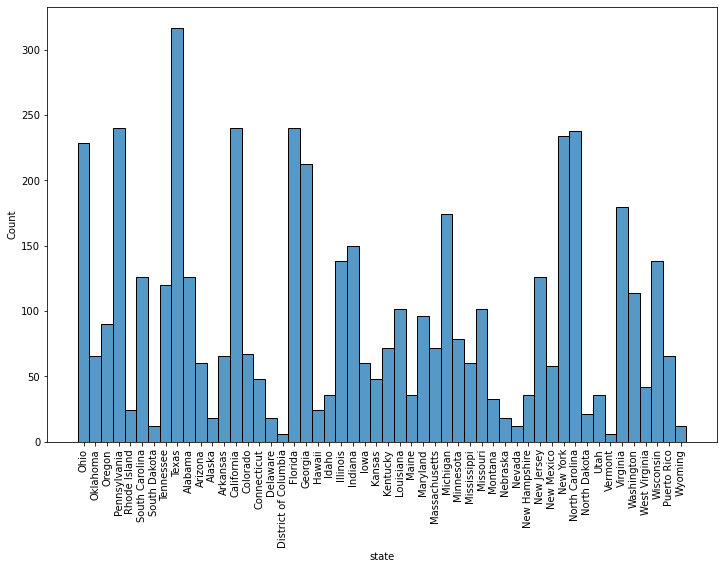

In [120]:
plt.figure(figsize=(12,8))
sns.histplot(data['state'])
plt.xticks(rotation=90);

- Histogram showing the distribution of entries for each state.

#### Checking how many entries increased in population from 2015 to 2016.

In [121]:
data['county_population_increased_2015_2016'].value_counts()

True     3323
False    1622
Name: county_population_increased_2015_2016, dtype: int64

> Most counties increased in population.

#### Checking to see how many entries exist for each year.

In [122]:
data['year'].value_counts()

2015    829
2013    827
2014    827
2012    824
2011    821
2010    817
Name: year, dtype: int64

#### Checking to see if each county has nearly similar amounts of entries. 

In [123]:
data['county name'].value_counts()

Washington County         54
Jefferson County          54
Montgomery County         42
Madison County            42
Wayne County              30
                          ..
Ward County                3
Rice County                3
Lewis and Clark County     3
Broomfield County          1
Athens County              1
Name: county name, Length: 661, dtype: int64

> Here we see that each county for the most part has varying amounts of entries total.

#### Narrowing down the data to just 2015 to see entries easier.

In [124]:
data_2015 = data[data['year'] == 2015]
data_2015['county name'].value_counts()

Jefferson County      9
Washington County     9
Madison County        7
Montgomery County     7
Franklin County       5
                     ..
Medina County         1
Miami County          1
Muskingum County      1
Ross County           1
Mayagüez Municipio    1
Name: county name, Length: 661, dtype: int64

#### Checking for duplicate entries for the counties.

In [125]:
data_2015[data_2015.duplicated(['county name'])]

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
4176,DeKalb County,Illinois,True,2015,52577,5.2,6.0,7.2,8.0,13.5,...,5.0,5.2,5.4,6.2,4.5,3.1,3.4,1.9,1.0,1.1
4201,Floyd County,Indiana,True,2015,39812,6.6,6.6,5.6,6.9,5.8,...,7.6,7.4,7.4,8.3,6.1,5.6,2.8,2.3,1.4,1.4
4209,Lake County,Indiana,False,2015,251795,5.9,6.3,6.5,6.4,6.3,...,6.0,6.2,7.0,7.2,6.4,4.6,3.4,2.2,1.6,1.4
4211,Madison County,Indiana,False,2015,64859,5.5,5.4,6.3,6.7,5.8,...,5.8,7.0,7.3,5.9,6.7,5.8,3.7,2.8,1.1,1.7
4224,Johnson County,Iowa,True,2015,73486,5.4,6.2,5.2,9.4,15.4,...,5.0,5.1,5.2,5.0,4.9,3.2,2.9,1.6,0.6,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Jefferson County,Wisconsin,True,2015,42512,5.9,5.7,6.4,7.1,6.5,...,7.3,7.1,7.9,7.7,6.5,5.8,3.0,2.1,2.2,1.2
4928,Portage County,Wisconsin,True,2015,34735,4.4,4.8,6.3,8.7,11.4,...,6.4,6.6,6.9,7.2,5.7,5.8,2.8,2.7,1.2,1.3
4934,Washington County,Wisconsin,True,2015,67829,5.4,7.3,6.1,6.2,5.0,...,5.6,7.6,9.1,8.8,6.0,5.4,3.6,2.7,1.9,1.3
4936,Winnebago County,Wisconsin,True,2015,84537,5.0,7.0,5.0,6.6,10.1,...,6.3,6.9,7.1,7.0,5.8,4.8,2.9,2.3,2.0,1.3


In [126]:
# checking one of the 'duplicated' entries from above
data_2015[data_2015['county name'] == 'DeKalb County']

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
4140,DeKalb County,Georgia,True,2015,386772,6.7,5.5,6.6,5.4,6.8,...,7.2,6.9,6.8,5.8,5.2,4.1,1.9,1.6,0.9,0.7
4176,DeKalb County,Illinois,True,2015,52577,5.2,6.0,7.2,8.0,13.5,...,5.0,5.2,5.4,6.2,4.5,3.1,3.4,1.9,1.0,1.1
4257,DeKalb County,Alabama,False,2015,36043,3.9,9.2,4.7,7.3,6.2,...,7.2,6.5,6.7,5.8,6.9,4.6,4.2,2.6,1.4,0.8


In [127]:
# checking one of the most common county names from above
data_2015[data_2015['county name'] == 'Jefferson County']

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
4246,Jefferson County,Kentucky,True,2015,394385,6.1,5.9,5.8,5.7,6.2,...,6.7,6.4,7.0,6.7,6.4,4.7,3.4,2.0,1.4,1.4
4261,Jefferson County,Alabama,False,2015,348184,6.0,6.2,5.7,5.8,6.4,...,5.9,6.2,6.8,6.8,6.0,5.2,2.7,1.8,1.7,1.3
4292,Jefferson County,Arkansas,False,2015,36065,5.8,5.7,6.9,5.6,7.8,...,6.3,5.5,7.0,9.0,4.1,4.1,4.6,2.7,1.2,1.0
4346,Jefferson County,Colorado,True,2015,284049,5.2,5.8,5.5,5.5,5.7,...,6.5,6.8,7.3,7.8,6.5,5.2,3.5,2.2,1.4,1.4
4408,Jefferson County,Ohio,False,2015,35097,5.2,5.6,5.2,6.4,6.3,...,6.7,6.7,7.6,6.1,10.3,7.0,3.3,3.4,2.3,1.2
4635,Jefferson County,Texas,True,2015,124291,6.8,7.0,6.4,6.7,6.8,...,6.6,6.3,6.7,6.4,5.8,4.5,2.6,1.7,1.3,1.4
4771,Jefferson County,Missouri,True,2015,113136,6.1,7.6,5.3,6.1,5.7,...,6.1,6.6,8.0,7.4,6.3,4.3,4.0,1.9,1.6,0.9
4835,Jefferson County,New York,False,2015,55675,9.6,7.0,5.5,5.7,8.0,...,5.1,5.6,5.8,5.7,4.1,3.8,3.0,0.9,1.8,1.2
4920,Jefferson County,Wisconsin,True,2015,42512,5.9,5.7,6.4,7.1,6.5,...,7.3,7.1,7.9,7.7,6.5,5.8,3.0,2.1,2.2,1.2


> There are duplicate entries, but in this case that is because there are multiple states that have counties with the same name.

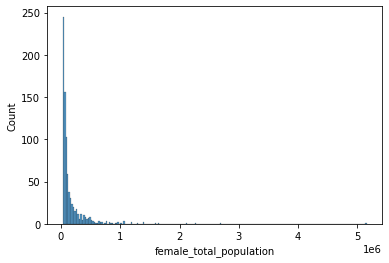

In [128]:
sns.histplot(data_2015['female_total_population']);

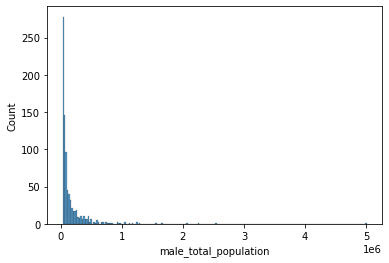

In [129]:
sns.histplot(data_2015['male_total_population']);

- Histograms showing the distributions of the female and male total population from 2015.

In [130]:
# checking how many times each state shows up in the 2015 df
data_2015['state'].value_counts()

Texas                   53
Florida                 40
North Carolina          40
California              40
Pennsylvania            40
Ohio                    39
New York                39
Georgia                 36
Virginia                30
Michigan                29
Indiana                 25
Wisconsin               23
Illinois                23
New Jersey              21
Alabama                 21
South Carolina          21
Tennessee               20
Washington              19
Louisiana               17
Missouri                17
Maryland                16
Oregon                  15
Minnesota               14
Colorado                12
Kentucky                12
Massachusetts           12
Puerto Rico             11
Arkansas                11
Oklahoma                11
New Mexico              10
Arizona                 10
Iowa                    10
Mississippi             10
Kansas                   8
Connecticut              8
West Virginia            7
Idaho                    6
M

## Modeling

---

#### Train Test Split and Converting the True/False Y entries to 0 and 1

In [287]:
X = data.drop(columns='county_population_increased_2015_2016')
y = data['county_population_increased_2015_2016'] # target for predictions

y = y.astype(int) # binarizing the entries

# stratify y to create equal proportions of the classes in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Baseline Model

In [288]:
y.value_counts(normalize=True)

1    0.671992
0    0.328008
Name: county_population_increased_2015_2016, dtype: float64

> The majority class is True (1) at 0.67, so the accuracy score needs to be above that in order to be a better model than just guessing the majority class.

### Logistic Regression with All Features

In [289]:
# the column transformer is 'transforming' the data fed into the pipeline 
# in this case changing the categorical columns to numerical values for the model
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    remainder='passthrough', verbose_feature_names_out=False
)

In [290]:
# scaling the numerical features to put them all on the same 'scale' for comparison
pipe1 = make_pipeline(
    ct1,
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=10_000)
)

In [291]:
pipe1 # checking the pipeline for each step for the coefficients later on

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000190AB947460>)],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [292]:
pipe1.fit(X_train, y_train)
pipe1.score(X_train, y_train), pipe1.score(X_test, y_test) # gives accuracy score

(0.9943365695792881, 0.98464025869038)

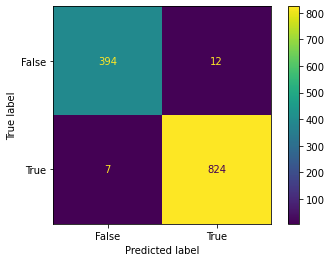

In [293]:
# amount predicted correctly vs incorrectly
ConfusionMatrixDisplay.from_estimator(pipe1, X_test, y_test, display_labels=['False', 'True']);

In [294]:
# generating the coefficients from the pipeline (it puts them all into an array of 1)
pipe1_coefs = pd.Series(pipe1.named_steps['logisticregression'].coef_[0], 
          index=pipe1.named_steps['columntransformer'].get_feature_names_out()) #get's the column names

In [295]:
pipe1_coefs.sort_values() # sorting into ascending order

female_age_85_and_over_pct   -2.181535
female_age_75_to_79_pct      -2.153894
female_age_80_to_84_pct      -1.834585
state_New Jersey             -1.325475
state_New York               -1.156305
                                ...   
male_age_75_to_79_pct         1.116731
female_age_40_to_44_pct       1.216152
state_Missouri                1.293840
state_Oregon                  1.976906
state_Florida                 2.046627
Length: 751, dtype: float64

In [296]:
# the np.expm1 converts the coef from log odds to "times likely"
coefs_df = pd.DataFrame(np.expm1(pipe1_coefs).sort_values(ascending=False), columns=['coefs'])
coefs_df

,coefs
state_Florida,6.741742
state_Oregon,6.220369
state_Missouri,2.646762
female_age_40_to_44_pct,2.374178
male_age_75_to_79_pct,2.054850
...,...
state_New York,-0.685353
state_New Jersey,-0.734323
female_age_80_to_84_pct,-0.840320
female_age_75_to_79_pct,-0.883969


> The biggest predictors of the population growing seem to be the states of Florida and Orgeon. The biggest predictors of it declining are the percent population of females ages 75 and over, as well as the states of New York and New Jersey.

In [304]:
# generating the prediction probabilities from the test set and comparing to the true values
preds_df = pd.DataFrame(pipe1.predict_proba(X_test), columns=['p(False)', 'p(True)'])
preds_df['true_values'] = y_test.values
preds_df

,p(False),p(True),true_values
0,0.002216,0.997784,1
1,0.000575,0.999425,1
2,0.000322,0.999678,1
3,0.999917,0.000083,0
4,0.001809,0.998191,1
...,...,...,...
1232,0.001574,0.998426,1
1233,0.000204,0.999796,1
1234,0.998302,0.001698,0
1235,0.000442,0.999558,1


- These are the probabilites of each prediction, where 1 = True and 0 = False for population growth. You can see that each prediction we see is very high in confidence.

### Logistic Regression Without Some Columns

In [247]:
data.head()

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
0,Stark County,Ohio,False,2010,192651,5.5,6.3,6.0,6.2,5.7,...,7.0,7.4,8.1,7.4,6.2,4.8,3.1,2.6,2.0,1.5
1,Summit County,Ohio,False,2010,279592,5.6,5.8,6.2,6.5,6.1,...,6.8,7.6,8.1,7.5,5.6,3.6,3.3,2.5,2.0,1.2
2,Trumbull County,Ohio,False,2010,108490,5.4,5.9,6.3,6.2,5.0,...,6.7,7.1,8.1,6.9,7.5,5.7,3.0,2.5,2.6,1.5
3,Tuscarawas County,Ohio,False,2010,47279,5.5,5.2,7.7,6.5,4.9,...,5.5,7.2,8.1,6.2,7.2,4.0,4.0,2.4,2.5,1.4
4,Warren County,Ohio,True,2010,105706,6.4,7.0,8.5,6.4,4.2,...,6.9,8.3,7.4,5.2,5.7,3.3,2.3,1.7,1.3,0.7


In [305]:
X = data.drop(columns=['county_population_increased_2015_2016', 'female_total_population', 
              'male_total_population', 'state'])
y = data['county_population_increased_2015_2016']

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [306]:
ct2 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    remainder='passthrough', verbose_feature_names_out=False
)

In [307]:
pipe2 = make_pipeline(
    ct2,
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=10_000)
)

In [308]:
pipe2.fit(X_train, y_train)
pipe2.score(X_train, y_train), pipe2.score(X_test, y_test)

(0.9762675296655879, 0.9563459983831851)

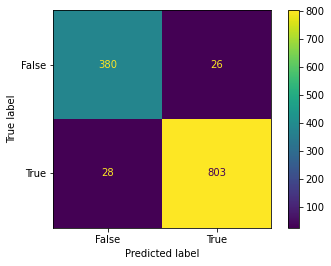

In [309]:
ConfusionMatrixDisplay.from_estimator(pipe2, X_test, y_test, display_labels=['False', 'True']);

> Reducing those features made the model perform slightly worse than previously.

In [310]:
pipe2_coefs = pd.Series(pipe2.named_steps['logisticregression'].coef_[0], 
          index=pipe2.named_steps['columntransformer'].get_feature_names_out())

In [311]:
pipe2_coefs.sort_values()

female_age_75_to_79_pct      -2.124046
female_age_85_and_over_pct   -2.042641
female_age_80_to_84_pct      -1.577296
male_age_20_to_24_pct        -1.073678
county name_Coryell County   -0.698678
                                ...   
female_age_40_to_44_pct       0.735120
female_age_20_to_24_pct       0.901462
male_age_85_and_over_pct      1.556224
male_age_80_to_84_pct         1.672467
male_age_75_to_79_pct         2.549809
Length: 697, dtype: float64

In [312]:
coefs_df_2 = pd.DataFrame(np.expm1(pipe2_coefs).sort_values(ascending=False), columns=['coefs'])
coefs_df_2

,coefs
male_age_75_to_79_pct,11.804653
male_age_80_to_84_pct,4.325290
male_age_85_and_over_pct,3.740884
female_age_20_to_24_pct,1.463202
female_age_40_to_44_pct,1.085733
...,...
county name_Coryell County,-0.502758
male_age_20_to_24_pct,-0.658251
female_age_80_to_84_pct,-0.793467
female_age_85_and_over_pct,-0.870314


> After removing the states from this model, the biggest predictors of the population increasing seem to the population percents of males ages 75 and over, as well as females ages 20-44. The biggest predictors of the population decreasing is females ages 75 and over, and males ages 20-24.

In [318]:
preds_df2 = pd.DataFrame(pipe2.predict_proba(X_test), columns=['p(False)', 'p(True)'])
preds_df2['true_values'] = y_test.values
preds_df2

,p(False),p(True),true_values
0,0.001202,0.998798,1
1,0.000386,0.999614,1
2,0.000526,0.999474,1
3,0.999713,0.000287,0
4,0.001082,0.998918,1
...,...,...,...
1232,0.000616,0.999384,1
1233,0.000352,0.999648,1
1234,0.998720,0.001280,0
1235,0.000231,0.999769,1


- These are the probabilites of each prediction, where 1 = True and 0 = False for population growth. Same as the previous model, each prediction we see is very high in confidence.

# Documentation

---

With this dataset, the first things I did were take a brief look at the dataframe (`df.head()`) and then the info (`df.info()`). This gave me an idea of the data types in each column and how large the dataset was. Then I checked for NaN's and did `df.describe()`. I also checked to see if there were any duplicate values within the dataset. Those were the most important checks to see, as they can and will inhibit the modeling process later on. NaN values can't be processed in a model, and duplicate values can skew the accuracy. Upon inspection, there was only one county that had any NaN values and it didn't have data for any year, so I dropped those from the dataset in this case. The reason I did this is because there was no data at all for this county. If there were more NaN values or if there was data for at least one year, I would have imputed data for those values. As for duplicates, there were many counties that had appeared to be duplicates, but it turns out there are many states that have the same name for their counties. Hence, there weren't actual duplicate values in the dataset. In addition, I just did some exploring into the data to see if anything else stood out, such as narrowing the data to one year for ease of exploration and creating a histogram of the state distributions in the dataset.

For the modeling, I used Logistic Regression as this was a classification problem (the y value being True or False). Whenever I tackle a classification problem, I tend to start off with Logistic Regression because it works fairly well for most data and gives interpretable coefficients at the end to aid in interpretation. I first created a `Baseline Model` to compare to and discovered that the majority class was `True` at 67%. This meant that any model I built would have to have an accuracy score above 0.67 in order to be an improvement on the baseline (or just guessing the majority class each time).  Next I used `Train Test Split` to split the data into train and test sets. I used all the features in the model, `Standard Scaling` the numerical features and `One Hot Encoding` the categorical ones. I also converted the y values of 'True' and 'False' to 0 and 1, 0 being False and 1 being True. I used a pipeline to accomplish this. This model wound up performing very well, with an accuracy score of 0.98 on the test set, which was definintely an improvement over the baseline. Interestingly, the coefficients from this model showed that certain states seemed to have an increased influence over the predictions over some of the population distributions. For this reason, I decided to try another Logistic Regression model, eliminating the states and the total population (male and female) columns this time. Other than removing those columns, everything else about the way the model was setup remained the same. This model lost a bit of accuracy, but not by much (0.95 on the test set). Now, the coefficients that influenced the predictions the most were mostly the population distributions. For both models, after making a dataframe of the prediction probabilities next to the true values, I saw that the predictions were fairly accurate for the most part with minimal missclassifications. 